In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn


import os
import glob
from pathlib import Path

from collections import Counter
from itertools import cycle, islice

from PIL import Image
from sys import argv
from warnings import filterwarnings
filterwarnings("ignore")

C:\Users\MICHEAL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def plot_dist(df, col_name, color):
    """
    Function for plotting based on column name
    Input parameters:- 
    df = dataframe
    col_name = column name
    color = type of plot (pie, box, bar)"""
    
    cmap = cm.get_cmap('RdYlGn')
    
    
    image =  df[col_name].value_counts().plot(kind=color, colormap = cmap)
    sn.distplot(df[col_name].value_counts())
    #image.figure.savefig(f"{col_name}.jpg")
    
    return image

In [3]:

pat = "annotations_CSV"

In [6]:
path = f"{pat}/*?.csv"

batch_list = []
i = 0  #variable for keeping track of first dataframe in loop before concatenating others

for files in glob.glob(path):  #iterate through folder to concatenate csv into dataframes
    
    #extract batch names
    f_name = os.path.split(files)[-1]
    #print(f_name)
    batch = "_".join(f_name.split("_")[:-1])
    #print(batch)
    #batch = batch.split(".")[-2]
    batch_list.append(batch)
    #print(batch)

    if i == 0:  #create new dataframe in first iteration
        
        df = pd.read_csv(files)
        
        #the following lines can be uncommented to view bar plots of individual dataframes
        #print('\033[1m' + f"Barplot for {batch}" + '\033[0m')
        #im = plot_dist(df, "label_name", "bar")  #plot individual dataframes
        #display(im.figure)

    else:  #concatenate other csv's with first dataframe
        data = pd.read_csv(files)
        
        #the following lines can be uncommented to view bar plots of individual dataframes
        #print('\033[1m' + f"Barplot for {batch}" + '\033[0m')
        #im = plot_dist(data, "label_name", "bar")  #plot individual dataframes
        #display(im.figure)
        
        df = pd.concat([df, data], ignore_index=True)
    i += 1
    
print('\033[1m' + f"Total number of current annotated batches for analysis is {len(batch_list)}" + '\033[0m')
print()
print(sorted(batch_list))

Total number of current annotated batches for analysis is 4

['batch_1', 'batch_2', 'batch_3', 'batch_4']


In [7]:
df

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,mri,17,16,138,173,mildDem0.jpg,176,208
1,mri,16,17,140,172,mildDem1.jpg,176,208
2,mri,18,17,139,175,mildDem10.jpg,176,208
3,mri,18,17,138,172,mildDem100.jpg,176,208
4,mri,16,17,139,174,mildDem101.jpg,176,208
...,...,...,...,...,...,...,...,...
795,mri,16,16,142,174,verymildDem345.jpg,176,208
796,mri,17,17,140,174,verymildDem346.jpg,176,208
797,mri,16,17,140,174,verymildDem347.jpg,176,208
798,mri,17,17,140,172,verymildDem348.jpg,176,208


### It can be observed that there are no null values in the dataframe 

In [8]:
df.isna().sum()

label_name      0
bbox_x          0
bbox_y          0
bbox_width      0
bbox_height     0
image_name      0
image_width     0
image_height    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label_name    800 non-null    object
 1   bbox_x        800 non-null    int64 
 2   bbox_y        800 non-null    int64 
 3   bbox_width    800 non-null    int64 
 4   bbox_height   800 non-null    int64 
 5   image_name    800 non-null    object
 6   image_width   800 non-null    int64 
 7   image_height  800 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 50.1+ KB


### Compute total number of each classes 

In [10]:
df.label_name.value_counts()

mri    800
Name: label_name, dtype: int64

In [11]:
len(df["image_name"].unique())

800

In [10]:
df.label_name.value_counts()

mri    600
Name: label_name, dtype: int64

### Plot entire dataframe

#### It can be observed that the prevalent labels are: - 
- front bumper damage
- hood damage
- headlight damage
- front fender damage

##### It can be observed that the prevalent damages are focused on the front of the vehicle

<AxesSubplot:xlabel='label_name', ylabel='Density'>

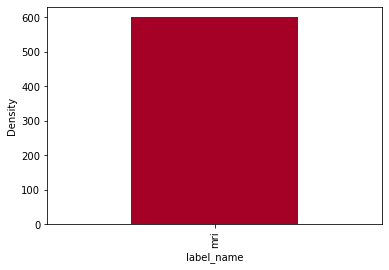

In [11]:
plot_dist(df, "label_name", "bar")